In [1]:
import pandas as pd
import geopandas as gpd

## 서울시 소방서 위치 확인

In [2]:
data = pd.read_csv("./location.csv", encoding = "cp949")
data.head()

,Unnamed: 0,서소이름,위도,경도
0,0,서대문소방서,37.573334,126.935980
1,1,동작소방서,37.494631,126.917764
2,2,양천소방서,37.530222,126.872135
3,3,중부소방서,37.564956,127.015453
4,4,강서소방서,37.558002,126.860344


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   서소이름        24 non-null     object 
 2   위도          24 non-null     float64
 3   경도          24 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes


In [4]:
office = gpd.points_from_xy(data.경도, data.위도)
office[0:3]

In [5]:
data["geometry"] = office
data.head()

,Unnamed: 0,서소이름,위도,경도,geometry
0,0,서대문소방서,37.573334,126.935980,POINT (126.9359802 37.5733339)
1,1,동작소방서,37.494631,126.917764,POINT (126.9177639 37.4946315)
2,2,양천소방서,37.530222,126.872135,POINT (126.872135 37.5302223)
3,3,중부소방서,37.564956,127.015453,POINT (127.0154527 37.5649557)
4,4,강서소방서,37.558002,126.860344,POINT (126.8603443 37.5580018)


In [6]:
data["서소이름"].unique()

array(['서대문소방서', '동작소방서', '양천소방서', '중부소방서', '강서소방서', '은평소방서', '송파소방서',
       '중랑소방서', '동대문소방서', '용산소방서', '관악소방서', '서초소방서', '구로소방서', '노원소방서',
       '종로소방서', '마포소방서', '도봉소방서', '광진소방서', '영등포소방서', '강북소방서', '강남소방서',
       '강동소방서', '성북소방서', '성동소방서'], dtype=object)

In [7]:
data = gpd.GeoDataFrame(data, geometry = 'geometry')

In [8]:
seoul_area = gpd.GeoDataFrame.from_file('./spatial_analysis-master/spatial_analysis-master/data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')

In [9]:
print(seoul_area.crs)
data.crs = {'init' : 'epsg:4326'}
print(data.crs)

{'init': 'epsg:5179'}
{'init': 'epsg:4326'}


In [10]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [11]:
data = data.to_crs({'init': 'epsg:5179'})

In [16]:
print(seoul_area.crs)
print(data.crs)

{'init': 'epsg:5179'}
{'init': 'epsg:5179'}


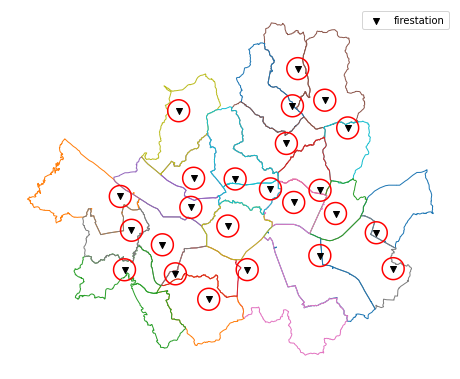

In [12]:
import matplotlib.pyplot as plt
buf_poly = gpd.GeoDataFrame({'geometry': data.buffer(1000)})

ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), facecolor = "None", edgecolor = "white")
data.plot(ax = ax, marker = 'v', color = 'black', label = "firestation")
buf_poly.boundary.plot(ax = ax, color = "red")
ax.set_axis_off()
plt.legend()
plt.show()

## 서울시 안전센터 위치 확인

In [19]:
safe_center = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/안전센터위치.csv", encoding = "cp949")
safe_center.head()

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242


In [21]:
safe_center["geometry"] = position
safe_center.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.8694519 37.527161)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.0964731 37.6102463)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.0171447 37.4877727)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.9583175 37.5278414)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.9812418 37.5448956)


In [22]:
safe_center = gpd.GeoDataFrame(safe_center, geometry = 'geometry')

In [23]:
safe_center.crs = {'init' : 'epsg:4326'}
print(safe_center.crs)

{'init': 'epsg:4326'}


In [24]:
safe_center = safe_center.to_crs({'init': 'epsg:5179'})

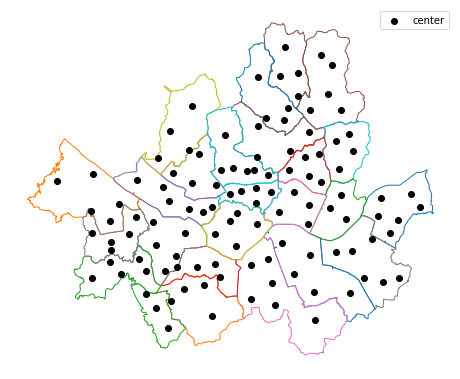

In [25]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), facecolor = "None", edgecolor = "white")
safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_axis_off()
plt.legend()
plt.show()

## 화재 자치구별 시각화 

In [26]:
def fire_place_gu(path):
    place = pd.read_csv(path, delimiter = '\t')
    colname = list(place.iloc[0,])
    place = place.iloc[2:,:]
    place.columns = colname
    place = place.reset_index()
    place.drop(['index'], axis=1, inplace=True)
    place = place.replace('-', 0)
    return place

In [27]:
fireplace2019 = fire_place_gu("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/baek_data/자치구 화재 장소/화재장소2019.txt")
fireplace2019.head()

,기간,자치구,합계,단독주택,공동주택,기타주택,학교,일반업무,판매시설,숙박시설,...,의료시설,공장 및 창고,작업장,위락오락시설,음식점,일반서비스시설,기타,운송(차량 철도 등),임야,기타
0,2019,종로구,232,33,24,2,3,18,7,5,...,2,3,11,2,46,8,12,18,1,36
1,2019,중구,213,10,21,1,1,21,11,6,...,1,4,20,2,21,10,4,13,2,62
2,2019,용산구,238,43,43,1,0,14,7,3,...,1,0,1,1,37,7,12,11,0,57
3,2019,성동구,194,38,45,0,0,9,3,1,...,1,11,21,4,12,10,9,12,0,16
4,2019,광진구,195,56,33,0,0,10,2,1,...,2,5,1,3,21,16,9,18,1,16


In [28]:
fireplace2019 = fireplace2019.iloc[:, :3]
fireplace2019.head()

,기간,자치구,합계
0,2019,종로구,232
1,2019,중구,213
2,2019,용산구,238
3,2019,성동구,194
4,2019,광진구,195


In [29]:
# fireplace2019["자치구"] == "노원구" 도봉구 성북구
for j in range(25):
    if seoul_area.loc[j, "SGG_NM"] == "서울시성북구":
        seoul_area.loc[j, "SGG_NM"] = "노원구"
        print("yes")

yes


In [30]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [31]:
fireplace2019["geometry"] = 0
fireplace2019.head()

,기간,자치구,합계,geometry
0,2019,종로구,232,0
1,2019,중구,213,0
2,2019,용산구,238,0
3,2019,성동구,194,0
4,2019,광진구,195,0


In [32]:
for gu in range(25):
    for j in range(25):
        if fireplace2019.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "합계"] = int(fireplace2019.loc[gu,"합계"] )
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,합계
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",254.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",335.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",456.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",242.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",311.0


In [34]:
import numpy as np
for j in range(25):
    if seoul_area.loc[j, "합계"] == 0:
        print(seoul_area.loc[:, "합계"])

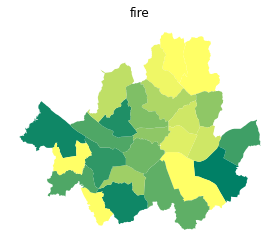

In [35]:
import warnings
warnings.filterwarnings(action='ignore')

fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="합계", figsize=(8,8), cmap = 'summer_r', scheme = 'quantiles', k = 19)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("fire")
ax.set_axis_off()
plt.show()